# Explore here

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow import keras
from keras.preprocessing import image


In [4]:
carpeta_train = 'data/raw/train'
carpeta_test = 'data/raw/test1'

#separar imagenes de train en subcarpetas cat y dog por el nombre de la imagen
for file in os.listdir(carpeta_train):
    if 'cat' in file:
        #saltar si es un directorio
        if os.path.isdir(carpeta_train + '/' + file):
            continue
        os.rename(carpeta_train + '/' + file, carpeta_train + '/cat/' + file)
    elif 'dog' in file:
        #saltar si es un directorio
        if os.path.isdir(carpeta_train + '/' + file):
            continue
        os.rename(carpeta_train + '/' + file, carpeta_train + '/dog/' + file)

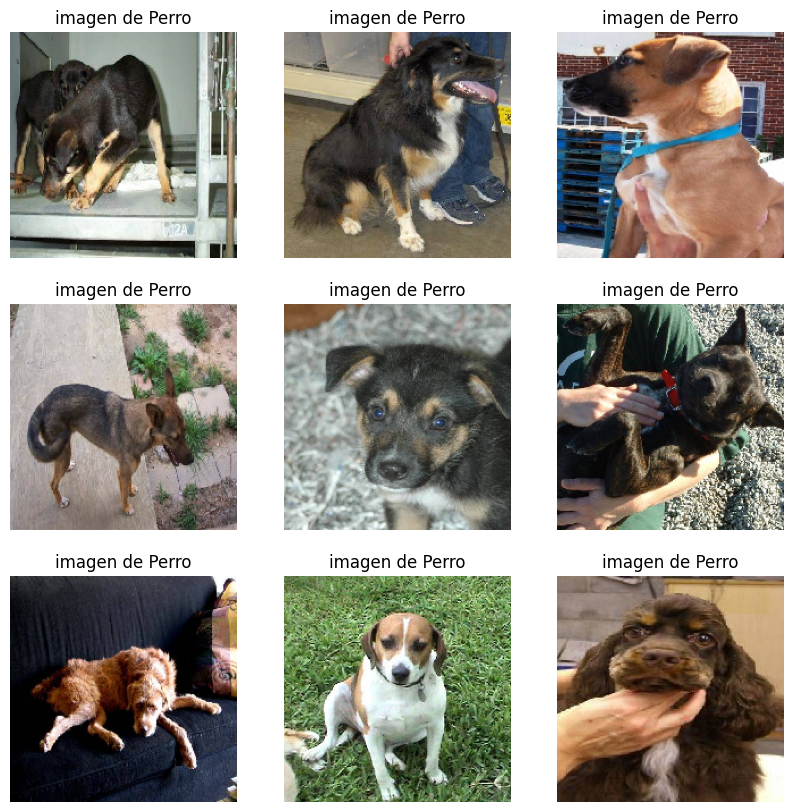

In [3]:
subfolder_perros = 'data/raw/train/dog'
subfolder_gatos = 'data/raw/train/cat'

#obtener una lista de todos los nombres de los archivos de perros
perros = os.listdir(subfolder_perros)
#obtener una lista de todos los nombres de los archivos de gatos
gatos = os.listdir(subfolder_gatos)

#cargar las nueve primeras imagenes de perros
imagenes_perros =[]
for i in range(9):
    img = image.load_img(subfolder_perros + '/' + perros[i], target_size=(200, 200))
    img = image.img_to_array(img)
    imagenes_perros.append(img)

#creo una figura de 3x3 para mostrar las imagenes
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(imagenes_perros[i].astype(np.uint8))
    plt.axis('off')
    plt.title('imagen de Perro')
plt.show()

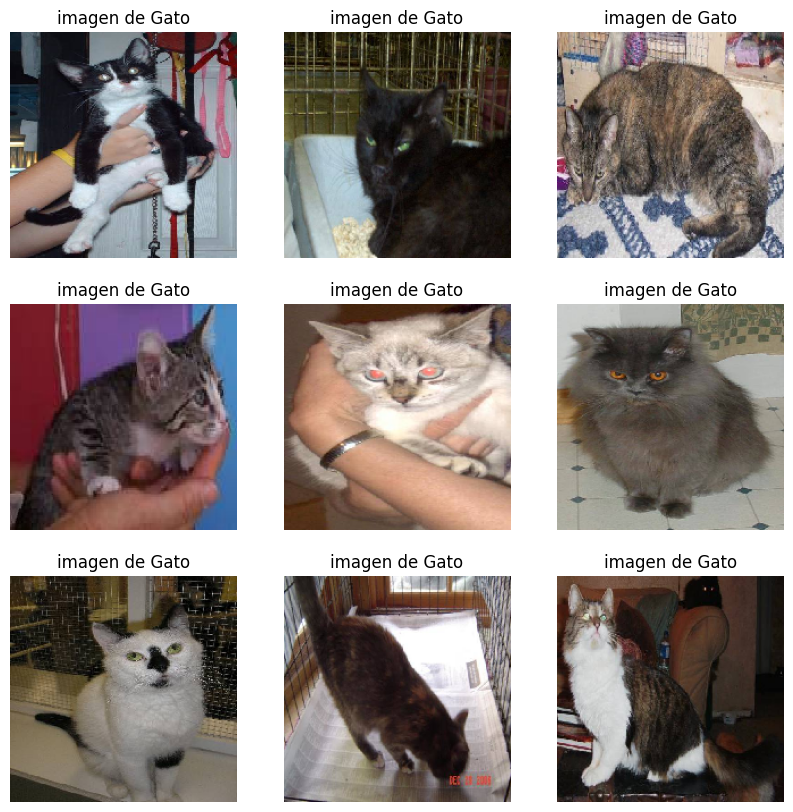

In [4]:
#cargar las nueve primeras imagenes de gatos
imagenes_gatos =[]
for i in range(9):
    img = image.load_img(subfolder_gatos + '/' + gatos[i], target_size=(200, 200))
    img = image.img_to_array(img)
    imagenes_gatos.append(img)

#creo una figura de 3x3 para mostrar las imagenes
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(imagenes_gatos[i].astype(np.uint8))
    plt.axis('off')
    plt.title('imagen de Gato')
plt.show()

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#creamos reglas de preprocesamiento para las imagenes
train_dir = 'data/raw/train'
test_dir = 'data/raw/'

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

train_data = datagentrain.flow_from_directory(train_dir, 
                                              target_size=(200, 200),
                                              batch_size=32, 
                                              classes=['cat', 'dog'])

test_data = datagentest.flow_from_directory(test_dir,
                                            target_size=(200, 200),
                                            batch_size=32,
                                            classes=['test1'])

Found 7344 images belonging to 2 classes.
Found 8411 images belonging to 1 classes.


In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Rescaling

model = Sequential()
model.add(Rescaling(1./255, input_shape=(200, 200, 3)))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

2025-04-17 19:04:11.419100: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-17 19:04:11.422557: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-17 19:04:11.431117: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744916651.445893    4491 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744916651.452198    4491 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744916651.466134    4491 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(optimizer = 'adam', loss = CategoricalCrossentropy(), metrics = ['accuracy'])

In [8]:
model.fit(train_data, epochs = 70)

/home/vscode/.local/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/70


 26/230 ━━━━━━━━━━━━━━━━━━━━ 56:56 17s/step - accuracy: 0.5135 - loss: 0.8259

KeyboardInterrupt: 